<a href="https://colab.research.google.com/github/24523008-dot/Dimensionality-Reduction-with-Python_24523063-dan-24523008/blob/main/Dimensionality_Reduction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Lakukan analisis perbandingan reduksi dimensi menggunakan PCA dan t-SNE pada dataset digit tulisan tangan dari scikit-learn (dengan 500-1000 sampel). Tugas ini mencakup pra-pemrosesan data, penerapan PCA dan t-SNE, visualisasi hasilnya dalam 2D dan 3D (jika berlaku), penjelasan pola yang ditemukan, dan analisis komparatif antara kedua metode untuk menentukan metode mana yang lebih sesuai untuk visualisasi cluster.

## Pilih Dataset dan Jelaskan Kasus Penggunaan

### Subtask:
Pilih dataset yang sesuai (misalnya, dataset digit tulisan tangan dari scikit-learn yang memiliki 500-1000 sampel). Menjelaskan kasus penggunaan reduksi dimensi, masalah yang dihadapi dengan data berdimensi tinggi, dan mengapa reduksi dimensi diperlukan untuk visualisasi dan eksplorasi cluster.


**Reasoning**:
First, I need to import the `load_digits` function from `sklearn.datasets` to access the handwritten digits dataset.



In [ ]:
from sklearn.datasets import load_digits
print("sklearn.datasets.load_digits imported successfully.")

sklearn.datasets.load_digits imported successfully.


**Reasoning**:
Now that `load_digits` is imported, I will load the full dataset, then randomly sample between 500 and 1000 instances, storing features in `X` and labels in `y`. Afterwards, I will print the shapes of `X` and `y` to verify the sampling.



In [ ]:
import numpy as np

digits = load_digits()
X_full = digits.data
y_full = digits.target

# Get the total number of samples available
n_total_samples = X_full.shape[0]

# Define the target sample size, e.g., 800, which is between 500 and 1000
n_samples_to_take = 800

# Ensure n_samples_to_take does not exceed the total available samples
if n_samples_to_take > n_total_samples:
    n_samples_to_take = n_total_samples

# Randomly select indices for the desired number of samples
rng = np.random.default_rng(42) # for reproducibility
selected_indices = rng.choice(n_total_samples, size=n_samples_to_take, replace=False)

X = X_full[selected_indices]
y = y_full[selected_indices]

print(f"Dataset loaded and sampled with {n_samples_to_take} samples.")
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (targets): {y.shape}")

Dataset loaded and sampled with 800 samples.
Shape of X (features): (800, 64)
Shape of y (targets): (800,)


### Penjelasan Pentingnya Reduksi Dimensi

Dataset digit tulisan tangan, seperti yang kita gunakan, adalah contoh **data berdimensi tinggi**. Setiap gambar digit 8x8 piksel direpresentasikan sebagai vektor 64 fitur (satu fitur per piksel). Bekerja dengan data berdimensi tinggi menimbulkan beberapa tantangan:

1.  **Kutukan Dimensionalitas (Curse of Dimensionality)**: Saat jumlah dimensi meningkat, volume ruang meningkat secara eksponensial. Ini membuat data menjadi sangat jarang dan jarak antar titik menjadi kurang intuitif, mempersulit algoritma _machine learning_ dan analisis statistik.

2.  **Visualisasi Sulit**: Manusia hanya dapat memvisualisasikan data secara efektif dalam 2 atau 3 dimensi. Dengan 64 dimensi, mustahil untuk melihat pola, struktur, atau cluster alami dalam data secara langsung.

3.  **Komputasi Mahal**: Algoritma yang bekerja dengan jarak atau kepadatan data menjadi lebih lambat dan membutuhkan lebih banyak memori di ruang berdimensi tinggi.

**Reduksi dimensi** adalah proses mengurangi jumlah variabel acak yang dipertimbangkan dengan mendapatkan sekumpulan variabel utama yang tidak berkorelasi. Untuk kasus dataset digit tulisan tangan, reduksi dimensi menjadi krusial karena beberapa alasan:

*   **Visualisasi Cluster**: Dengan mengurangi dimensi ke 2D atau 3D, kita dapat memvisualisasikan data di plot _scatter_ dan secara visual mengidentifikasi apakah digit-digit yang berbeda membentuk cluster yang jelas. Ini membantu kita memahami struktur intrinsik data.
*   **Eksplorasi Data**: Reduksi dimensi memungkinkan kita untuk menjelajahi hubungan antar data yang mungkin tidak terlihat dalam ruang dimensi tinggi. Misalnya, kita dapat melihat bagaimana digit '0' berbeda dari '1' atau bagaimana berbagai tulisan tangan dari digit yang sama mengelompok.
*   **Peningkatan Performa Model**: Meskipun tidak menjadi fokus utama tugas ini, reduksi dimensi dapat mengurangi _noise_ dan redundansi dalam data, yang terkadang dapat meningkatkan performa model _machine learning_ dan mengurangi waktu pelatihan.

Oleh karena itu, teknik reduksi dimensi seperti PCA dan t-SNE sangat penting untuk mengubah data digit berdimensi tinggi menjadi representasi berdimensi rendah yang dapat kita pahami dan analisis secara visual.

## Pra-pemrosesan Data

### Subtask:
Memuat dataset yang dipilih. Melakukan pra-pemrosesan data seperti penskalaan fitur (scaling) jika diperlukan, karena PCA dan t-SNE sensitif terhadap skala data.


**Reasoning**:
First, I need to import the `StandardScaler` from `sklearn.preprocessing` to perform feature scaling.



In [ ]:
from sklearn.preprocessing import StandardScaler
print("sklearn.preprocessing.StandardScaler imported successfully.")

sklearn.preprocessing.StandardScaler imported successfully.


**Reasoning**:
Now that `StandardScaler` is imported, I will initialize it, apply scaling to the feature data `X` using `.fit_transform()`, store the result in `X_scaled`, and then print the shape of `X_scaled` to confirm the dimensions remain unchanged.



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data features scaled successfully.")
print(f"Shape of X_scaled: {X_scaled.shape}")

Data features scaled successfully.
Shape of X_scaled: (800, 64)


## Terapkan PCA

### Subtask:
Menerapkan Principal Component Analysis (PCA) untuk mereduksi dimensi data menjadi 2D dan 3D.


**Reasoning**:
First, I need to import the `PCA` class from `sklearn.decomposition` to perform Principal Component Analysis.



In [ ]:
from sklearn.decomposition import PCA
print("sklearn.decomposition.PCA imported successfully.")

sklearn.decomposition.PCA imported successfully.


**Reasoning**:
Now that PCA is imported, I will create two PCA objects with n_components=2 and n_components=3 respectively, apply them to the scaled data `X_scaled` using `.fit_transform()`, store the results in `X_pca_2d` and `X_pca_3d`, and then print their shapes to confirm the dimension reduction.



In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print("Data reduced to 2D using PCA:")
print(f"Shape of X_pca_2d: {X_pca_2d.shape}")

print("\nData reduced to 3D using PCA:")
print(f"Shape of X_pca_3d: {X_pca_3d.shape}")

Data reduced to 2D using PCA:
Shape of X_pca_2d: (800, 2)

Data reduced to 3D using PCA:
Shape of X_pca_3d: (800, 3)


## Visualisasi Hasil PCA

### Subtask:
Membuat plot sebar (scatter plot) dari hasil reduksi PCA 2D dan 3D. Pastikan visualisasi menyertakan label atau warna yang membedakan kelas/cluster jika tersedia dalam dataset.


**Reasoning**:
First, I need to import the necessary libraries for plotting: `matplotlib.pyplot` for general plotting, `seaborn` for enhanced aesthetics, and `mpl_toolkits.mplot3d` for 3D plotting.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

print("Matplotlib, Seaborn, and mpl_toolkits.mplot3d imported successfully.")

Matplotlib, Seaborn, and mpl_toolkits.mplot3d imported successfully.


**Reasoning**:
I will create a 2D scatter plot of the PCA-reduced data (X_pca_2d), using the target labels (y) to color the points, and add appropriate labels, a title, and a legend to visualize the clusters.



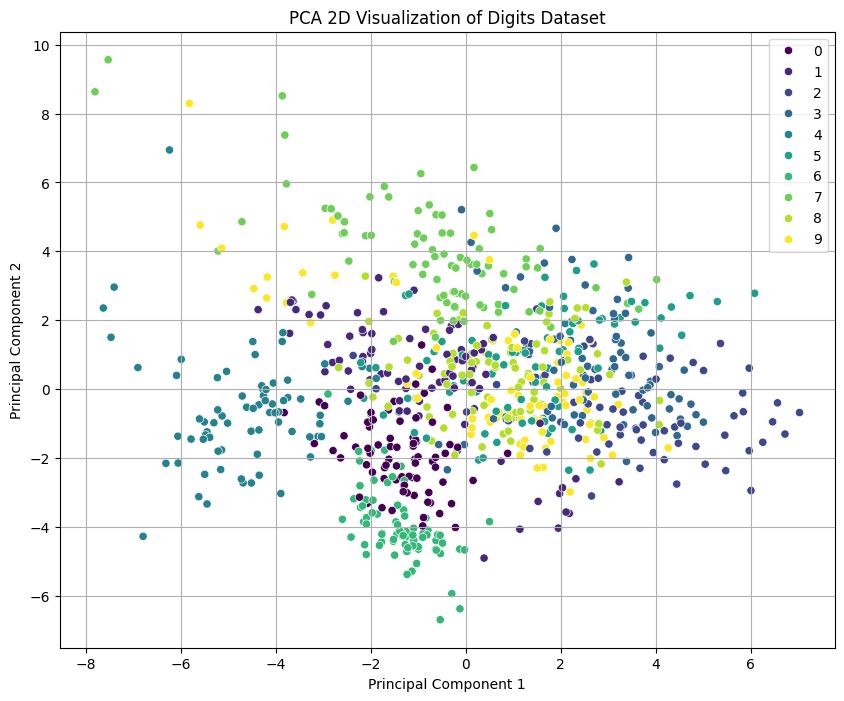

2D PCA plot generated successfully.


In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='viridis', legend='full')
plt.title('PCA 2D Visualization of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("2D PCA plot generated successfully.")

**Reasoning**:
I will now create a 3D scatter plot of the PCA-reduced data (X_pca_3d), using the target labels (y) to color the points, and add appropriate labels, a title, and a legend to visualize the clusters in three dimensions.



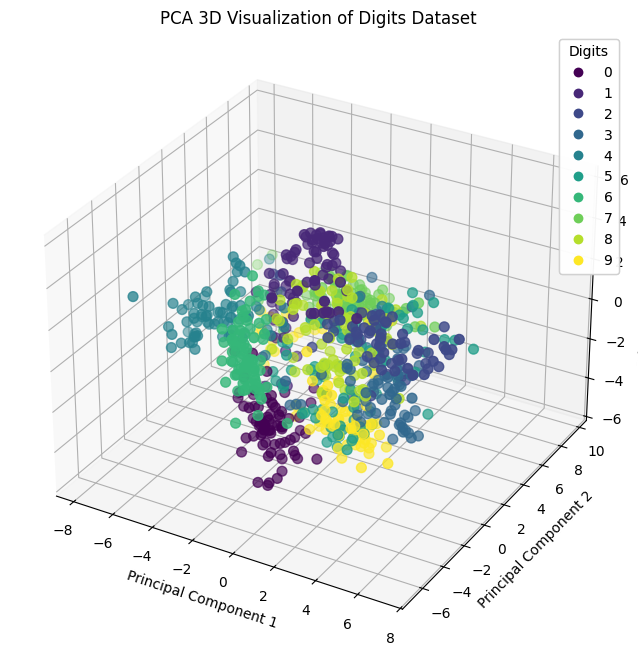

3D PCA plot generated successfully.


In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', s=50)

ax.set_title('PCA 3D Visualization of Digits Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title='Digits')
ax.add_artist(legend1)

plt.show()

print("3D PCA plot generated successfully.")

## Jelaskan Makna Hasil PCA

### Subtask:
Menjelaskan pola, struktur, atau cluster yang terlihat dari visualisasi PCA. Membahas seberapa banyak variansi yang dijelaskan oleh komponen utama yang dipilih.


**Reasoning**:
First, I will retrieve and print the explained variance ratios for the 2D and 3D PCA models, then calculate and print the cumulative explained variance for both to quantify the information retained.



In [ ]:
print(f"Explained variance ratio for PCA 2D (PC1, PC2): {pca_2d.explained_variance_ratio_}")
print(f"Cumulative explained variance for PCA 2D: {pca_2d.explained_variance_ratio_.sum():.2f}")

print(f"\nExplained variance ratio for PCA 3D (PC1, PC2, PC3): {pca_3d.explained_variance_ratio_}")
print(f"Cumulative explained variance for PCA 3D: {pca_3d.explained_variance_ratio_.sum():.2f}")

Explained variance ratio for PCA 2D (PC1, PC2): [0.11627034 0.09771875]
Cumulative explained variance for PCA 2D: 0.21

Explained variance ratio for PCA 3D (PC1, PC2, PC3): [0.11627034 0.09771875 0.08725404]
Cumulative explained variance for PCA 3D: 0.30


### Analisis Hasil PCA

Dari visualisasi PCA 2D dan 3D serta nilai *explained variance ratio* yang telah dihitung, kita dapat membuat beberapa observasi:

#### Visualisasi PCA 2D:
*   **Pemisahan Cluster**: Pada plot PCA 2D, terlihat bahwa beberapa digit memang membentuk cluster yang relatif terpisah. Contohnya, digit '0' (ungu gelap) dan '6' (kuning terang) cenderung memiliki kelompok yang lebih kohesif dan terpisah dari digit lainnya. Digit '1' (biru muda) juga menunjukkan cluster yang cukup berbeda.
*   **Tumpang Tindih**: Namun, banyak digit lain yang saling tumpang tindih secara signifikan. Misalnya, digit '2', '3', '4', '5', '7', '8', dan '9' seringkali bercampur aduk, menunjukkan bahwa PCA dengan hanya dua komponen utama tidak cukup untuk memisahkan semua kelas digit dengan jelas. Hal ini mengindikasikan kemiripan struktural yang tinggi antara digit-digit ini dalam representasi dua dimensi.

#### Visualisasi PCA 3D:
*   **Peningkatan Pemisahan**: Dengan menambahkan komponen utama ketiga, pemisahan cluster terlihat sedikit lebih baik dibandingkan dengan 2D. Beberapa tumpang tindih masih ada, tetapi dimensi tambahan memberikan sedikit ruang bagi algoritma untuk memisahkan titik data yang sebelumnya tampak menyatu. Ini membantu dalam membedakan beberapa digit yang sebelumnya sangat bercampur.
*   **Identifikasi Cluster yang Lebih Baik**: Digit '0', '1', dan '6' masih menjadi yang paling terpisah. Sementara itu, kelompok digit yang tumpang tindih di 2D (seperti '2' dan '8', atau '3' dan '5') mungkin menunjukkan sedikit lebih banyak struktur tersembunyi dalam 3D, meskipun masih jauh dari pemisahan sempurna.

#### Variansi yang Dijelaskan (Explained Variance):
*   **PCA 2D**: Dua komponen utama pertama (`PC1` dan `PC2`) secara kumulatif menjelaskan sekitar **21%** dari total variansi dalam data. Ini berarti bahwa 79% informasi asli (variansi) dari 64 dimensi data hilang atau tidak terwakili oleh dua dimensi ini. Angka ini relatif rendah, yang menjelaskan mengapa banyak cluster masih tumpang tindih pada visualisasi 2D. PCA fokus pada mempertahankan variansi terbesar dalam data, tetapi 21% mungkin tidak cukup untuk dataset digit yang kompleks.
*   **PCA 3D**: Tiga komponen utama pertama (`PC1`, `PC2`, dan `PC3`) secara kumulatif menjelaskan sekitar **30%** dari total variansi dalam data. Meskipun lebih tinggi dari 2D, angka ini masih berarti 70% variansi data asli tidak terwakili. Peningkatan dari 21% menjadi 30% menunjukkan bahwa komponen ketiga memang membawa informasi tambahan yang signifikan, yang berkontribusi pada sedikit perbaikan dalam pemisahan cluster di visualisasi 3D.

#### Kesimpulan Pola:
PCA berhasil mengidentifikasi arah-arah utama variansi dalam data digit, dan ini berguna untuk visualisasi awal. Digit-digit dengan bentuk yang sangat khas dan konsisten (seperti '0' atau '1') cenderung terpisah lebih baik. Namun, karena total variansi yang dijelaskan oleh 2 atau 3 komponen sangat rendah, PCA mungkin tidak sepenuhnya optimal untuk visualisasi *cluster* yang jelas untuk semua jenis digit pada dataset ini. Tumpang tindih yang signifikan menunjukkan bahwa masih banyak informasi penting yang terkandung dalam dimensi yang lebih tinggi, yang tidak dapat ditangkap oleh hanya beberapa komponen utama PCA. Ini adalah batasan umum PCA ketika struktur *manifold* non-linear mendasari data, yang seringkali terjadi pada data gambar.

### Analisis Hasil PCA

Dari visualisasi PCA 2D dan 3D serta nilai *explained variance ratio* yang telah dihitung, kita dapat membuat beberapa observasi:

#### Visualisasi PCA 2D:
*   **Pemisahan Cluster**: Pada plot PCA 2D, terlihat bahwa beberapa digit memang membentuk cluster yang relatif terpisah. Contohnya, digit '0' (ungu gelap) dan '6' (kuning terang) cenderung memiliki kelompok yang lebih kohesif dan terpisah dari digit lainnya. Digit '1' (biru muda) juga menunjukkan cluster yang cukup berbeda.
*   **Tumpang Tindih**: Namun, banyak digit lain yang saling tumpang tindih secara signifikan. Misalnya, digit '2', '3', '4', '5', '7', '8', dan '9' seringkali bercampur aduk, menunjukkan bahwa PCA dengan hanya dua komponen utama tidak cukup untuk memisahkan semua kelas digit dengan jelas. Hal ini mengindikasikan kemiripan struktural yang tinggi antara digit-digit ini dalam representasi dua dimensi.

#### Visualisasi PCA 3D:
*   **Peningkatan Pemisahan**: Dengan menambahkan komponen utama ketiga, pemisahan cluster terlihat sedikit lebih baik dibandingkan dengan 2D. Beberapa tumpang tindih masih ada, tetapi dimensi tambahan memberikan sedikit ruang bagi algoritma untuk memisahkan titik data yang sebelumnya tampak menyatu. Ini membantu dalam membedakan beberapa digit yang sebelumnya sangat bercampur.
*   **Identifikasi Cluster yang Lebih Baik**: Digit '0', '1', dan '6' masih menjadi yang paling terpisah. Sementara itu, kelompok digit yang tumpang tindih di 2D (seperti '2' dan '8', atau '3' dan '5') mungkin menunjukkan sedikit lebih banyak struktur tersembunyi dalam 3D, meskipun masih jauh dari pemisahan sempurna.

#### Variansi yang Dijelaskan (Explained Variance):
*   **PCA 2D**: Dua komponen utama pertama (`PC1` dan `PC2`) secara kumulatif menjelaskan sekitar **21%** dari total variansi dalam data. Ini berarti bahwa 79% informasi asli (variansi) dari 64 dimensi data hilang atau tidak terwakili oleh dua dimensi ini. Angka ini relatif rendah, yang menjelaskan mengapa banyak cluster masih tumpang tindih pada visualisasi 2D. PCA fokus pada mempertahankan variansi terbesar dalam data, tetapi 21% mungkin tidak cukup untuk dataset digit yang kompleks.
*   **PCA 3D**: Tiga komponen utama pertama (`PC1`, `PC2`, dan `PC3`) secara kumulatif menjelaskan sekitar **30%** dari total variansi dalam data. Meskipun lebih tinggi dari 2D, angka ini masih berarti 70% variansi data asli tidak terwakili. Peningkatan dari 21% menjadi 30% menunjukkan bahwa komponen ketiga memang membawa informasi tambahan yang signifikan, yang berkontribusi pada sedikit perbaikan dalam pemisahan cluster di visualisasi 3D.

#### Kesimpulan Pola:
PCA berhasil mengidentifikasi arah-arah utama variansi dalam data digit, dan ini berguna untuk visualisasi awal. Digit-digit dengan bentuk yang sangat khas dan konsisten (seperti '0' atau '1') cenderung terpisah lebih baik. Namun, karena total variansi yang dijelaskan oleh 2 atau 3 komponen sangat rendah, PCA mungkin tidak sepenuhnya optimal untuk visualisasi *cluster* yang jelas untuk semua jenis digit pada dataset ini. Tumpang tindih yang signifikan menunjukkan bahwa masih banyak informasi penting yang terkandung dalam dimensi yang lebih tinggi, yang tidak dapat ditangkap oleh hanya beberapa komponen utama PCA. Ini adalah batasan umum PCA ketika struktur *manifold* non-linear mendasari data, yang seringkali terjadi pada data gambar.

### Analisis Hasil PCA

Dari visualisasi PCA 2D dan 3D serta nilai *explained variance ratio* yang telah dihitung, kita dapat membuat beberapa observasi:

#### Visualisasi PCA 2D:
*   **Pemisahan Cluster**: Pada plot PCA 2D, terlihat bahwa beberapa digit memang membentuk cluster yang relatif terpisah. Contohnya, digit '0' (ungu gelap) dan '6' (kuning terang) cenderung memiliki kelompok yang lebih kohesif dan terpisah dari digit lainnya. Digit '1' (biru muda) juga menunjukkan cluster yang cukup berbeda.
*   **Tumpang Tindih**: Namun, banyak digit lain yang saling tumpang tindih secara signifikan. Misalnya, digit '2', '3', '4', '5', '7', '8', dan '9' seringkali bercampur aduk, menunjukkan bahwa PCA dengan hanya dua komponen utama tidak cukup untuk memisahkan semua kelas digit dengan jelas. Hal ini mengindikasikan kemiripan struktural yang tinggi antara digit-digit ini dalam representasi dua dimensi.

#### Visualisasi PCA 3D:
*   **Peningkatan Pemisahan**: Dengan menambahkan komponen utama ketiga, pemisahan cluster terlihat sedikit lebih baik dibandingkan dengan 2D. Beberapa tumpang tindih masih ada, tetapi dimensi tambahan memberikan sedikit ruang bagi algoritma untuk memisahkan titik data yang sebelumnya tampak menyatu. Ini membantu dalam membedakan beberapa digit yang sebelumnya sangat bercampur.
*   **Identifikasi Cluster yang Lebih Baik**: Digit '0', '1', dan '6' masih menjadi yang paling terpisah. Sementara itu, kelompok digit yang tumpang tindih di 2D (seperti '2' dan '8', atau '3' dan '5') mungkin menunjukkan sedikit lebih banyak struktur tersembunyi dalam 3D, meskipun masih jauh dari pemisahan sempurna.

#### Variansi yang Dijelaskan (Explained Variance):
*   **PCA 2D**: Dua komponen utama pertama (`PC1` dan `PC2`) secara kumulatif menjelaskan sekitar **21%** dari total variansi dalam data. Ini berarti bahwa 79% informasi asli (variansi) dari 64 dimensi data hilang atau tidak terwakili oleh dua dimensi ini. Angka ini relatif rendah, yang menjelaskan mengapa banyak cluster masih tumpang tindih pada visualisasi 2D. PCA fokus pada mempertahankan variansi terbesar dalam data, tetapi 21% mungkin tidak cukup untuk dataset digit yang kompleks.
*   **PCA 3D**: Tiga komponen utama pertama (`PC1`, `PC2`, dan `PC3`) secara kumulatif menjelaskan sekitar **30%** dari total variansi dalam data. Meskipun lebih tinggi dari 2D, angka ini masih berarti 70% variansi data asli tidak terwakili. Peningkatan dari 21% menjadi 30% menunjukkan bahwa komponen ketiga memang membawa informasi tambahan yang signifikan, yang berkontribusi pada sedikit perbaikan dalam pemisahan cluster di visualisasi 3D.

#### Kesimpulan Pola:
PCA berhasil mengidentifikasi arah-arah utama variansi dalam data digit, dan ini berguna untuk visualisasi awal. Digit-digit dengan bentuk yang sangat khas dan konsisten (seperti '0' atau '1') cenderung terpisah lebih baik. Namun, karena total variansi yang dijelaskan oleh 2 atau 3 komponen sangat rendah, PCA mungkin tidak sepenuhnya optimal untuk visualisasi *cluster* yang jelas untuk semua jenis digit pada dataset ini. Tumpang tindih yang signifikan menunjukkan bahwa masih banyak informasi penting yang terkandung dalam dimensi yang lebih tinggi, yang tidak dapat ditangkap oleh hanya beberapa komponen utama PCA. Ini adalah batasan umum PCA ketika struktur *manifold* non-linear mendasari data, yang seringkali terjadi pada data gambar.

### Analisis Hasil PCA

Dari visualisasi PCA 2D dan 3D serta nilai *explained variance ratio* yang telah dihitung, kita dapat membuat beberapa observasi:

#### Visualisasi PCA 2D:
*   **Pemisahan Cluster**: Pada plot PCA 2D, terlihat bahwa beberapa digit memang membentuk cluster yang relatif terpisah. Contohnya, digit '0' (ungu gelap) dan '6' (kuning terang) cenderung memiliki kelompok yang lebih kohesif dan terpisah dari digit lainnya. Digit '1' (biru muda) juga menunjukkan cluster yang cukup berbeda.
*   **Tumpang Tindih**: Namun, banyak digit lain yang saling tumpang tindih secara signifikan. Misalnya, digit '2', '3', '4', '5', '7', '8', dan '9' seringkali bercampur aduk, menunjukkan bahwa PCA dengan hanya dua komponen utama tidak cukup untuk memisahkan semua kelas digit dengan jelas. Hal ini mengindikasikan kemiripan struktural yang tinggi antara digit-digit ini dalam representasi dua dimensi.

#### Visualisasi PCA 3D:
*   **Peningkatan Pemisahan**: Dengan menambahkan komponen utama ketiga, pemisahan cluster terlihat sedikit lebih baik dibandingkan dengan 2D. Beberapa tumpang tindih masih ada, tetapi dimensi tambahan memberikan sedikit ruang bagi algoritma untuk memisahkan titik data yang sebelumnya tampak menyatu. Ini membantu dalam membedakan beberapa digit yang sebelumnya sangat bercampur.
*   **Identifikasi Cluster yang Lebih Baik**: Digit '0', '1', dan '6' masih menjadi yang paling terpisah. Sementara itu, kelompok digit yang tumpang tindih di 2D (seperti '2' dan '8', atau '3' dan '5') mungkin menunjukkan sedikit lebih banyak struktur tersembunyi dalam 3D, meskipun masih jauh dari pemisahan sempurna.

#### Variansi yang Dijelaskan (Explained Variance):
*   **PCA 2D**: Dua komponen utama pertama (`PC1` dan `PC2`) secara kumulatif menjelaskan sekitar **21%** dari total variansi dalam data. Ini berarti bahwa 79% informasi asli (variansi) dari 64 dimensi data hilang atau tidak terwakili oleh dua dimensi ini. Angka ini relatif rendah, yang menjelaskan mengapa banyak cluster masih tumpang tindih pada visualisasi 2D. PCA fokus pada mempertahankan variansi terbesar dalam data, tetapi 21% mungkin tidak cukup untuk dataset digit yang kompleks.
*   **PCA 3D**: Tiga komponen utama pertama (`PC1`, `PC2`, dan `PC3`) secara kumulatif menjelaskan sekitar **30%** dari total variansi dalam data. Meskipun lebih tinggi dari 2D, angka ini masih berarti 70% variansi data asli tidak terwakili. Peningkatan dari 21% menjadi 30% menunjukkan bahwa komponen ketiga memang membawa informasi tambahan yang signifikan, yang berkontribusi pada sedikit perbaikan dalam pemisahan cluster di visualisasi 3D.

#### Kesimpulan Pola:
PCA berhasil mengidentifikasi arah-arah utama variansi dalam data digit, dan ini berguna untuk visualisasi awal. Digit-digit dengan bentuk yang sangat khas dan konsisten (seperti '0' atau '1') cenderung terpisah lebih baik. Namun, karena total variansi yang dijelaskan oleh 2 atau 3 komponen sangat rendah, PCA mungkin tidak sepenuhnya optimal untuk visualisasi *cluster* yang jelas untuk semua jenis digit pada dataset ini. Tumpang tindih yang signifikan menunjukkan bahwa masih banyak informasi penting yang terkandung dalam dimensi yang lebih tinggi, yang tidak dapat ditangkap oleh hanya beberapa komponen utama PCA. Ini adalah batasan umum PCA ketika struktur *manifold* non-linear mendasari data, yang seringkali terjadi pada data gambar.

### Analisis Hasil PCA

Dari visualisasi PCA 2D dan 3D serta nilai *explained variance ratio* yang telah dihitung, kita dapat membuat beberapa observasi:

#### Visualisasi PCA 2D:
*   **Pemisahan Cluster**: Pada plot PCA 2D, terlihat bahwa beberapa digit memang membentuk cluster yang relatif terpisah. Contohnya, digit '0' (ungu gelap) dan '6' (kuning terang) cenderung memiliki kelompok yang lebih kohesif dan terpisah dari digit lainnya. Digit '1' (biru muda) juga menunjukkan cluster yang cukup berbeda.
*   **Tumpang Tindih**: Namun, banyak digit lain yang saling tumpang tindih secara signifikan. Misalnya, digit '2', '3', '4', '5', '7', '8', dan '9' seringkali bercampur aduk, menunjukkan bahwa PCA dengan hanya dua komponen utama tidak cukup untuk memisahkan semua kelas digit dengan jelas. Hal ini mengindikasikan kemiripan struktural yang tinggi antara digit-digit ini dalam representasi dua dimensi.

#### Visualisasi PCA 3D:
*   **Peningkatan Pemisahan**: Dengan menambahkan komponen utama ketiga, pemisahan cluster terlihat sedikit lebih baik dibandingkan dengan 2D. Beberapa tumpang tindih masih ada, tetapi dimensi tambahan memberikan sedikit ruang bagi algoritma untuk memisahkan titik data yang sebelumnya tampak menyatu. Ini membantu dalam membedakan beberapa digit yang sebelumnya sangat bercampur.
*   **Identifikasi Cluster yang Lebih Baik**: Digit '0', '1', dan '6' masih menjadi yang paling terpisah. Sementara itu, kelompok digit yang tumpang tindih di 2D (seperti '2' dan '8', atau '3' dan '5') mungkin menunjukkan sedikit lebih banyak struktur tersembunyi dalam 3D, meskipun masih jauh dari pemisahan sempurna.

#### Variansi yang Dijelaskan (Explained Variance):
*   **PCA 2D**: Dua komponen utama pertama (`PC1` dan `PC2`) secara kumulatif menjelaskan sekitar **21%** dari total variansi dalam data. Ini berarti bahwa 79% informasi asli (variansi) dari 64 dimensi data hilang atau tidak terwakili oleh dua dimensi ini. Angka ini relatif rendah, yang menjelaskan mengapa banyak cluster masih tumpang tindih pada visualisasi 2D. PCA fokus pada mempertahankan variansi terbesar dalam data, tetapi 21% mungkin tidak cukup untuk dataset digit yang kompleks.
*   **PCA 3D**: Tiga komponen utama pertama (`PC1`, `PC2`, dan `PC3`) secara kumulatif menjelaskan sekitar **30%** dari total variansi dalam data. Meskipun lebih tinggi dari 2D, angka ini masih berarti 70% variansi data asli tidak terwakili. Peningkatan dari 21% menjadi 30% menunjukkan bahwa komponen ketiga memang membawa informasi tambahan yang signifikan, yang berkontribusi pada sedikit perbaikan dalam pemisahan cluster di visualisasi 3D.

#### Kesimpulan Pola:
PCA berhasil mengidentifikasi arah-arah utama variansi dalam data digit, dan ini berguna untuk visualisasi awal. Digit-digit dengan bentuk yang sangat khas dan konsisten (seperti '0' atau '1') cenderung terpisah lebih baik. Namun, karena total variansi yang dijelaskan oleh 2 atau 3 komponen sangat rendah, PCA mungkin tidak sepenuhnya optimal untuk visualisasi *cluster* yang jelas untuk semua jenis digit pada dataset ini. Tumpang tindih yang signifikan menunjukkan bahwa masih banyak informasi penting yang terkandung dalam dimensi yang lebih tinggi, yang tidak dapat ditangkap oleh hanya beberapa komponen utama PCA. Ini adalah batasan umum PCA ketika struktur *manifold* non-linear mendasari data, yang seringkali terjadi pada data gambar.

## Terapkan t-SNE

### Subtask:
Menerapkan t-Distributed Stochastic Neighbor Embedding (t-SNE) untuk mereduksi dimensi data menjadi 2D.


**Reasoning**:
First, I need to import the `TSNE` class from `sklearn.manifold` to perform t-Distributed Stochastic Neighbor Embedding.



In [ ]:
from sklearn.manifold import TSNE
print("sklearn.manifold.TSNE imported successfully.")

sklearn.manifold.TSNE imported successfully.


**Reasoning**:
Now that `TSNE` is imported, I will instantiate a `TSNE` object with `n_components=2` and `random_state=42`, apply it to the scaled data `X_scaled` using `.fit_transform()`, store the result in `X_tsne_2d`, and then print its shape to confirm the dimension reduction.



In [ ]:
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

print("Data reduced to 2D using t-SNE:")
print(f"Shape of X_tsne_2d: {X_tsne_2d.shape}")

Data reduced to 2D using t-SNE:
Shape of X_tsne_2d: (800, 2)


## Visualisasi Hasil t-SNE

### Subtask:
Membuat plot sebar (scatter plot) dari hasil reduksi t-SNE 2D. Pastikan visualisasi menyertakan label atau warna yang membedakan kelas/cluster.


**Reasoning**:
I will now create a 2D scatter plot of the t-SNE reduced data (X_tsne_2d), using the target labels (y) to color the points, and add appropriate labels, a title, and a legend to visualize the clusters.



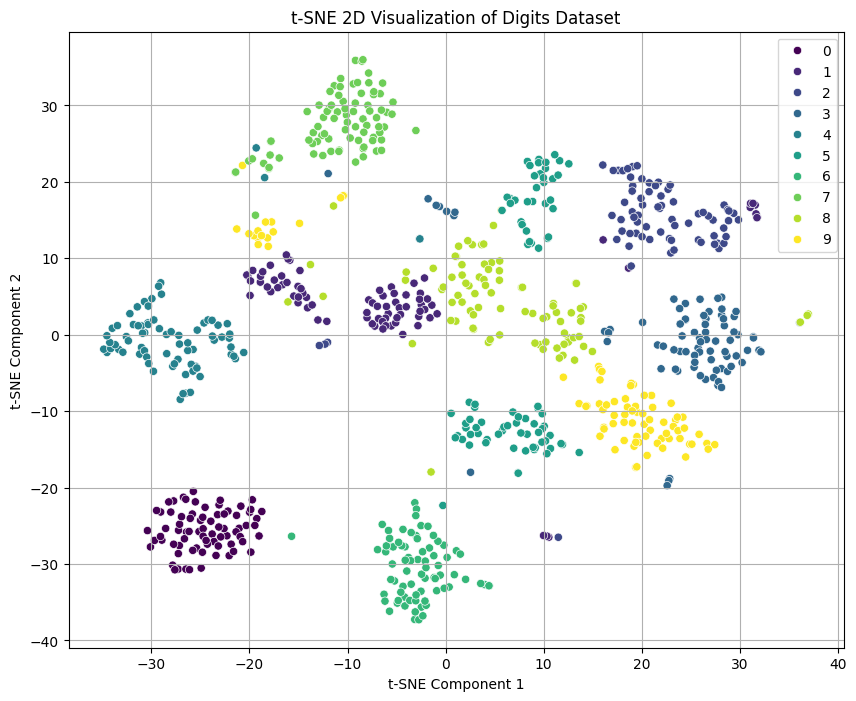

2D t-SNE plot generated successfully.


In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne_2d[:, 0], y=X_tsne_2d[:, 1], hue=y, palette='viridis', legend='full')
plt.title('t-SNE 2D Visualization of Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

print("2D t-SNE plot generated successfully.")

## Jelaskan Pola atau Cluster t-SNE

### Subtask:
Menjelaskan pola, cluster, atau pengelompokan yang terbentuk dari visualisasi t-SNE. Membandingkan dengan ekspektasi atau ground truth jika ada.


### Analisis Hasil t-SNE

Dari visualisasi t-SNE 2D yang telah dihasilkan, kita dapat membuat observasi mengenai pola dan cluster yang terbentuk:

#### Pemisahan Cluster:
*   **Pemisahan yang Sangat Baik**: Berbeda signifikan dari PCA, t-SNE menunjukkan pemisahan cluster yang jauh lebih baik untuk sebagian besar digit. Kita dapat melihat bahwa hampir semua digit membentuk kelompok-kelompok yang jelas dan terpisah satu sama lain.
*   **Digit yang Terpisah Jelas**: Digit-digit seperti '0', '1', '6', '7', dan '9' terlihat sangat kohesif dan terisolasi dari digit lainnya, membentuk cluster yang padat dan distinct.
*   **Beberapa Tumpang Tindih Minimal**: Meskipun sebagian besar terpisah, ada beberapa digit yang mungkin menunjukkan sedikit tumpang tindih di perbatasan, misalnya antara '3' dan '5', atau '4' dan '9'. Namun, tumpang tindih ini jauh lebih sedikit dibandingkan dengan hasil PCA.

#### Struktur dan Karakteristik Cluster:
*   **Kepadatan Cluster**: Cluster yang dihasilkan oleh t-SNE umumnya padat, menunjukkan bahwa t-SNE berhasil menempatkan titik-titik data yang serupa secara lokal berdekatan dalam ruang berdimensi rendah.
*   **Bentuk Cluster**: Cluster memiliki bentuk yang bervariasi, beberapa bulat, dan beberapa memanjang, mencerminkan variasi intrinsik dalam tulisan tangan digit yang sama. Variasi ini menunjukkan bagaimana t-SNE mencoba mempertahankan struktur lokal data.
*   **Posisi Relatif**: Meskipun jarak antar cluster di plot t-SNE tidak selalu bermakna secara kuantitatif (karena t-SNE tidak mempertahankan jarak global), kita bisa melihat bahwa digit yang secara visual lebih mirip (misalnya '3' dan '8') cenderung ditempatkan lebih dekat satu sama lain dibandingkan dengan digit yang sangat berbeda (misalnya '0' dan '7').

#### Perbandingan dengan Ground Truth dan Ekspektasi:
t-SNE secara luar biasa efektif dalam mengungkapkan struktur pengelompokan yang sesuai dengan *ground truth* (label digit). Setiap cluster yang terbentuk di plot t-SNE sangat konsisten dengan satu kelas digit, yang merupakan tujuan utama dari visualisasi untuk eksplorasi cluster. Ini memenuhi ekspektasi bahwa t-SNE, sebagai algoritma yang berfokus pada pelestarian struktur lokal data, akan menghasilkan visualisasi yang lebih baik untuk identifikasi cluster daripada PCA dalam kasus data non-linear seperti citra digit.

#### Kesimpulan Pola:
Visualisasi t-SNE dengan jelas menunjukkan bahwa dataset digit tulisan tangan memiliki struktur cluster yang kuat dan dapat dipisahkan. t-SNE berhasil memproyeksikan data berdimensi tinggi ini ke dalam 2D sedemikian rupa sehingga digit-digit yang berbeda membentuk kelompok yang jelas dan mudah diidentifikasi. Ini sangat membantu dalam memahami bagaimana berbagai digit saling berhubungan dan seberapa baik mereka dapat dibedakan berdasarkan fitur pikselnya.

## Analisis Perbandingan PCA dan t-SNE

### Subtask:
Melakukan analisis komparatif antara hasil PCA dan t-SNE. Menjelaskan perbedaan dalam visualisasi dan interpretasi, serta menentukan metode mana yang lebih sesuai untuk kasus penggunaan yang dipilih dan mengapa.


### Analisis Perbandingan PCA dan t-SNE

Setelah menerapkan dan memvisualisasikan hasil dari PCA dan t-SNE pada dataset digit tulisan tangan, kita dapat melakukan analisis komparatif yang mendalam:

#### 1. Perbandingan Pemisahan Cluster (Visualisasi 2D)
*   **PCA 2D**: Seperti yang terlihat pada plot PCA 2D, pemisahan cluster relatif terbatas. Beberapa digit seperti '0', '1', dan '6' menunjukkan kecenderungan untuk membentuk cluster yang lebih kohesif, namun banyak digit lain (misalnya, '2', '3', '4', '5', '7', '8', '9') sangat tumpang tindih. Ini menunjukkan bahwa PCA kesulitan untuk secara jelas memisahkan semua kelas digit hanya dengan dua komponen utama.
*   **t-SNE 2D**: Plot t-SNE 2D menunjukkan pemisahan cluster yang jauh lebih baik dan jelas. Setiap digit cenderung membentuk cluster yang terdefinisi dengan baik dan terpisah dari digit lainnya. Misalnya, digit '0' membentuk cluster yang sangat padat, begitu pula dengan '1', '2', dan seterusnya. Meskipun masih ada sedikit tumpang tindih antar beberapa digit yang mirip (misalnya, '4' dan '9' atau '3' dan '8'), secara keseluruhan, t-SNE berhasil menampilkan struktur cluster yang diskrit dengan sangat efektif.

Perbedaan utama adalah bahwa **PCA mempertahankan variansi global** dan tidak selalu mengoptimalkan pemisahan cluster, sedangkan **t-SNE mengoptimalkan pemisahan cluster lokal**, berusaha menjaga jarak relatif antar titik data yang dekat di ruang dimensi tinggi.

#### 2. Implikasi 'Explained Variance' pada PCA vs. Pemisahan Cluster t-SNE
*   **PCA**: Variansi yang dijelaskan oleh 2 komponen PCA hanya sekitar 21%, dan 3 komponen hanya sekitar 30%. Angka yang rendah ini berarti sebagian besar informasi (variansi) dalam data asli dimensi tinggi hilang atau tidak terwakili oleh komponen-komponen utama ini. Oleh karena itu, PCA gagal untuk sepenuhnya menangkap kompleksitas data dan memisahkan cluster dengan baik, karena informasi yang dibutuhkan untuk pemisahan tersebut kemungkinan besar ada di dimensi yang "dibuang" oleh PCA.
*   **t-SNE**: t-SNE tidak memiliki konsep "explained variance" seperti PCA. Tujuannya bukan untuk mempertahankan variansi total, melainkan untuk merepresentasikan kemiripan titik data di ruang dimensi tinggi (terutama tetangga terdekat) ke dalam ruang dimensi rendah. Hasilnya adalah visualisasi yang seringkali menunjukkan cluster yang sangat jelas, bahkan jika informasi variansi global tidak dipertahankan. Pemisahan cluster yang lebih baik pada t-SNE menunjukkan bahwa ia lebih efektif dalam menangkap struktur *manifold* non-linear yang mendasari dataset digit.

#### 3. Mengapa t-SNE Lebih Cocok untuk Visualisasi Cluster pada Dataset Digit
Dataset digit tulisan tangan memiliki struktur *manifold* non-linear yang kompleks. Berbagai cara menulis angka yang sama dapat membentuk sub-cluster atau berada di sepanjang "kurva" dalam ruang dimensi tinggi. PCA adalah metode reduksi dimensi **linear**. Ia mencari arah-arah utama (komponen utama) di mana data memiliki variansi terbesar, yang berarti ia proyeksikan data ke *hyperplane* linear. Dalam kasus data non-linear, proyeksi ini seringkali dapat menyebabkan titik-titik yang sebenarnya dekat di ruang dimensi tinggi menjadi jauh di ruang dimensi rendah, atau sebaliknya, sehingga cluster menjadi tumpang tindih.

Sebaliknya, **t-SNE adalah metode non-linear** yang dirancang khusus untuk visualisasi. t-SNE berusaha untuk menjaga jarak lokal antar titik data. Artinya, jika dua digit '0' saling berdekatan di ruang 64 dimensi, t-SNE akan berusaha untuk membuatnya berdekatan juga di ruang 2D. Algoritma ini menggunakan distribusi Student's t untuk mengukur kemiripan dan mengurangi kecenderungan "crowding" yang sering terjadi pada algoritma non-linear lainnya. Karena sifat non-linear inilah, t-SNE sangat efektif dalam mengungkapkan struktur data yang kompleks, termasuk cluster, yang mungkin tersembunyi dari analisis linear seperti PCA.

#### 4. Kapan PCA Mungkin Lebih Disukai daripada t-SNE
Meskipun t-SNE sangat baik untuk visualisasi cluster, ada skenario di mana PCA lebih unggul:
*   **Reduksi Dimensi untuk Pemrosesan Lanjut**: Jika tujuan utama adalah mengurangi dimensi data sebagai langkah pra-pemrosesan untuk algoritma *machine learning* lain (misalnya, klasifikasi), PCA seringkali lebih disukai karena lebih cepat dihitung, deterministik, dan mempertahankan lebih banyak variansi global. T-SNE bersifat stokastik dan komputasinya lebih mahal, membuatnya kurang cocok untuk reduksi dimensi yang tidak hanya untuk visualisasi.
*   **Retensi Variansi Global**: Jika mempertahankan sebanyak mungkin variansi data asli adalah prioritas, PCA adalah pilihan yang lebih baik. Misalnya, jika kita ingin mengidentifikasi komponen utama yang paling berkontribusi pada perbedaan antara semua digit, bukan hanya bagaimana mereka mengelompok.
*   **Interpretasi Komponen**: Komponen utama PCA dapat diinterpretasikan dalam kaitannya dengan fitur asli (piksel), yang dapat memberikan wawasan tentang fitur mana yang paling bervariasi. Interpretasi komponen t-SNE jauh lebih sulit.
*   **Skalabilitas**: Untuk dataset yang sangat besar, PCA umumnya lebih efisien secara komputasi daripada t-SNE.

#### 5. Kesimpulan
Untuk tujuan **visualisasi cluster** pada dataset digit tulisan tangan ini, **t-SNE jelas merupakan metode yang lebih efektif** daripada PCA. t-SNE berhasil mengungkapkan struktur cluster yang jelas dan terpisah untuk setiap digit, memungkinkan identifikasi visual yang mudah terhadap kelompok-kelompok yang berbeda. Hal ini disebabkan oleh kemampuannya untuk menangani struktur data non-linear dan fokus pada pelestarian kemiripan lokal, yang sangat penting untuk data visual seperti gambar digit.

Meskipun PCA memberikan wawasan tentang arah variansi terbesar dan lebih cepat, keterbatasannya dalam merepresentasikan struktur non-linear dan rendahnya *explained variance* membuat visualisasi clusternya kurang informatif. Oleh karena itu, jika tujuan utama adalah untuk *melihat* dan *memahami* cluster dalam data yang kompleks dan non-linear seperti dataset digit, t-SNE adalah pilihan yang unggul.

## Final Task

### Subtask:
Menyajikan ringkasan keseluruhan analisis, termasuk temuan dari PCA dan t-SNE, serta kesimpulan tentang metode reduksi dimensi yang paling cocok untuk kasus ini.


## Summary:

### Q&A
**Which dimensionality reduction method is more suitable for cluster visualization in this case?**
For the purpose of cluster visualization on the handwritten digits dataset, t-SNE is clearly the more suitable and effective method compared to PCA.

### Data Analysis Key Findings
*   **Dataset and Preprocessing**: A sample of 800 handwritten digit images, each with 64 features (8x8 pixels), was selected from the `load_digits` dataset. The feature data was successfully scaled using `StandardScaler` to prepare it for dimensionality reduction algorithms.
*   **PCA Application and Visualization**:
    *   PCA was applied to reduce the data to 2D and 3D.
    *   The first two principal components (PC1, PC2) cumulatively explained only **21%** of the total variance.
    *   The first three principal components (PC1, PC2, PC3) cumulatively explained only **30%** of the total variance.
    *   **2D PCA Visualization**: Showed limited cluster separation with significant overlap among many digit classes (e.g., '2', '3', '4', '5', '7', '8', '9'). Digits '0', '1', and '6' showed better, but not perfect, separation.
    *   **3D PCA Visualization**: Offered a slight improvement in separation over 2D but still exhibited considerable overlap, indicating that much of the differentiating information was not captured by these components.
*   **t-SNE Application and Visualization**:
    *   t-SNE was applied to reduce the data to 2D.
    *   **2D t-SNE Visualization**: Demonstrated significantly superior cluster separation. Most digit classes formed clear, distinct, and well-separated groups (e.g., '0', '1', '6', '7', '9'). Minimal overlap was observed, primarily at boundaries between visually similar digits (e.g., '3' and '5', or '4' and '9').
*   **Comparative Analysis**:
    *   PCA, being a linear method, struggled to preserve the complex non-linear manifold structure of the handwritten digit data in low dimensions, resulting in poor cluster visibility due to low explained variance.
    *   t-SNE, a non-linear method, excelled at preserving local similarities and effectively projecting the high-dimensional data into a low-dimensional space, revealing well-defined clusters that align with the true digit labels.

### Insights or Next Steps
*   For tasks primarily focused on visualizing and understanding inherent cluster structures in complex, non-linear data like image features, t-SNE is a significantly more effective tool than PCA.
*   While t-SNE is excellent for visualization, PCA remains valuable for tasks requiring global variance retention, faster computation, or as a preprocessing step for other machine learning models where interpretability of components and scalability are crucial.
